In [56]:
# importing dependencies

#data manipulation
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.offline as po
import plotly.graph_objs as go
import plotly.express as px

plt.style.use('ggplot')
%matplotlib inline

#quick eda
import ydata_profiling as pp

#feature engineering
import sklearn 
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#models packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

#metrics and other
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

#other (if will be needed)
import os, pickle
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('data/churn.csv', parse_dates=True).drop(columns='RowNumber')

In [32]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
display(df.shape)
display(df.describe())
display(df.isnull().sum())

(10000, 13)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [44]:
# gender to numeric

df['Is_Male'] = pd.to_numeric(df.Gender.apply(lambda x: 1 if x == 'Male' else 0))

df = df.drop(columns='Gender')

In [45]:
df

,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Is_Male
0,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,39,5,0.00,2,1,0,96270.64,0,1
9996,15569892,Johnstone,516,France,35,10,57369.61,1,1,1,101699.77,0,1
9997,15584532,Liu,709,France,36,7,0.00,1,0,1,42085.58,1,0
9998,15682355,Sabbatini,772,Germany,42,3,75075.31,2,1,0,92888.52,1,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
 12  Is_Male          10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [49]:
df["Exited"].value_counts().values

array([7963, 2037], dtype=int64)

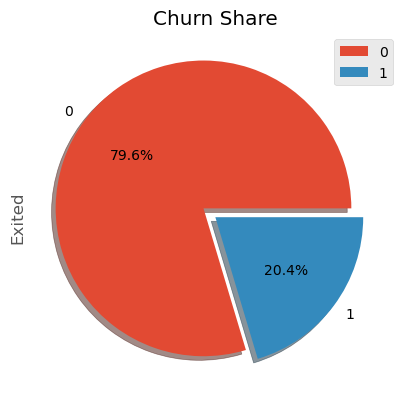

In [61]:
df.Exited.value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1,0], shadow=True)
plt.title('Churn Share')
plt.legend()


Text(0.5, 1.0, 'Customers churn by Gender')

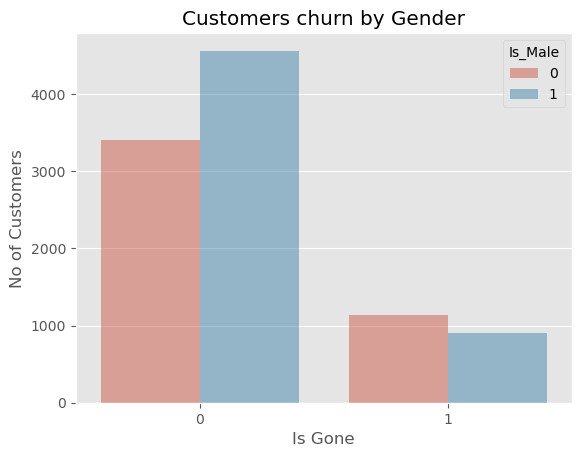

In [69]:
sns.countplot(x='Exited', data=df, hue='Is_Male', alpha=0.5)
plt.ylabel('No of Customers')
plt.xlabel('Is Gone')
plt.title('Customers churn by Gender')

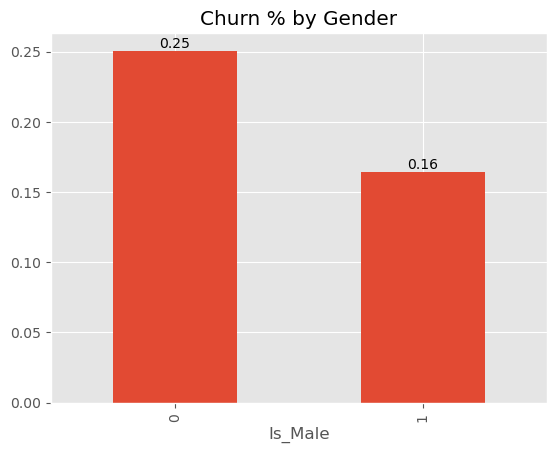

In [79]:
# churn % by gender

ax = df.groupby('Is_Male')['Exited'].mean().plot(kind='bar')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
plt.title('Churn % by Gender')
plt.show()